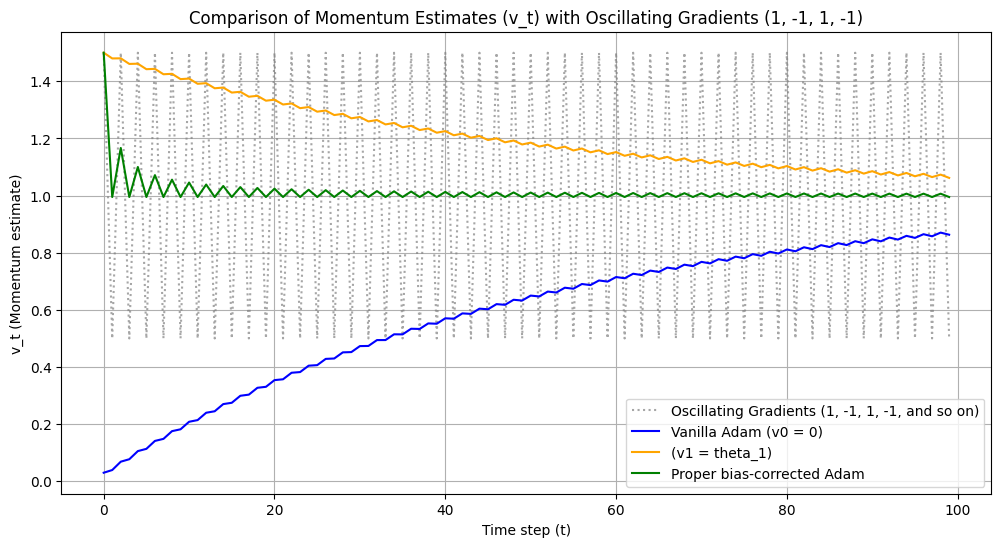

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating an oscillating gradient sequence: 1, -1, 1, -1, ...
timesteps = 100
theta = np.array([.5 if i % 2 == 0 else -0.5 for i in range(timesteps)]) + 1 # Oscillating gradient

beta = 0.98  # Momentum decay

# 1. v0 = 0 (Vanilla Adam without bias correction)
v_vanilla = np.zeros(timesteps)

# 2. v1 = theta_1 (User's suggestion)
v_first_gradient = np.zeros(timesteps)
v_first_gradient[0] = theta[0]

# 3. Proper bias-corrected Adam
v_bias_corrected = np.zeros(timesteps)
v_bias_corrected_unscaled = np.zeros(timesteps)

# Arrays to store the actual values of v_t in each case
vanilla_v = []
first_gradient_v = []
bias_corrected_v = []
unbiased_v = []

# Perform the updates for each approach
for t in range(timesteps):
    
    # Vanilla Adam (v0 = 0, no bias correction)
    if t == 0:
        v_vanilla[t] = (1 - beta) * theta[t]
    else:
        v_vanilla[t] = beta * v_vanilla[t-1] + (1 - beta) * theta[t]
    
    # User's suggestion (v1 = theta_1)
    if t > 0:
        v_first_gradient[t] = beta * v_first_gradient[t-1] + (1 - beta) * theta[t]
    
    # Bias-corrected Adam
    if t == 0:
        v_bias_corrected_unscaled[t] = (1 - beta) * theta[t]
    else:
        v_bias_corrected_unscaled[t] = beta * v_bias_corrected_unscaled[t-1] + (1 - beta) * theta[t]
    
    # Bias correction scaling factor (1 - beta^t)
    bias_correction_factor = 1 - beta**(t+1)
    
    # Apply the bias correction
    v_bias_corrected[t] = v_bias_corrected_unscaled[t] / bias_correction_factor
    
    # Store the values for plotting
    vanilla_v.append(v_vanilla[t])
    first_gradient_v.append(v_first_gradient[t])
    bias_corrected_v.append(v_bias_corrected[t])
    unbiased_v.append(v_bias_corrected_unscaled[t])

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the oscillating gradient values (optional for visualization)
plt.plot(theta, label='Oscillating Gradients (1, -1, 1, -1, and so on)', linestyle=':', color='gray', alpha=0.7)

# Plot the momentum estimates for each method
plt.plot(vanilla_v, label='Vanilla Adam (v0 = 0)', marker='', linestyle='-', color='blue')
plt.plot(first_gradient_v, label="(v1 = theta_1)", marker='', linestyle='-', color='orange')
plt.plot(bias_corrected_v, label='Proper bias-corrected Adam', marker='', linestyle='-', color='green')

plt.xlabel('Time step (t)')
plt.ylabel('v_t (Momentum estimate)')
plt.title('Comparison of Momentum Estimates (v_t) with Oscillating Gradients (1, -1, 1, -1)')
plt.legend()
plt.grid(True)
plt.show()
